# Music Mashup


Read the file

In [ ]:
artist_file = 'nf.txt'
with open(artist_file) as f: # The with keyword automatically closes the file when you are done
    print (f.read(1000))

I could write a record full of radio songs
Do a bunch of features that my label would love
Do a bunch of features that I don't even like-
Just to build up the hype, yeah
I could sell my house and move out to LA
Get inside of rooms with the biggest of names
Hire fifty people just to give me advice on the way I should write
Oh God!
Yeah, sounds like a nightmare, if you ask me
Yeah, went from my bedroom to the big leagues
You know how many times that I was told things-
Wouldn't work, but worked out, having cold feet
Didn't keep me from success, but delayed it some
I used to be the guy who'd kill to get a number one
I had to hear "that song's a hit!" before I thought it was
But nowadays I don't really give a— (What?!)
Oh God! (Yeah)
Might catch me at the award show-
Eatin' popcorn in the back row
Catchin' Zs with my hat low
No nominations, but it's cool though
Oh God
You might see me in the same clothes-
I had on last week, am I ashamed? No
Yeah, you heard the sayin'
"If it ain't broke, do

Another file

In [ ]:
artist_file = '../input/Lil_Wayne.txt'
with open(artist_file) as f: # The with keyword automatically closes the file when you are done
    print (f.read(1000))

Plot word frequencies for txt

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
def plotWordFrequency(input):
    f = open(artist_file,'r')
    words = [x for y in [l.split() for l in f.readlines()] for x in y]
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'grey', edgecolor = 'black',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words: %s' % (artist_file), fontsize=24)
    plt.show()

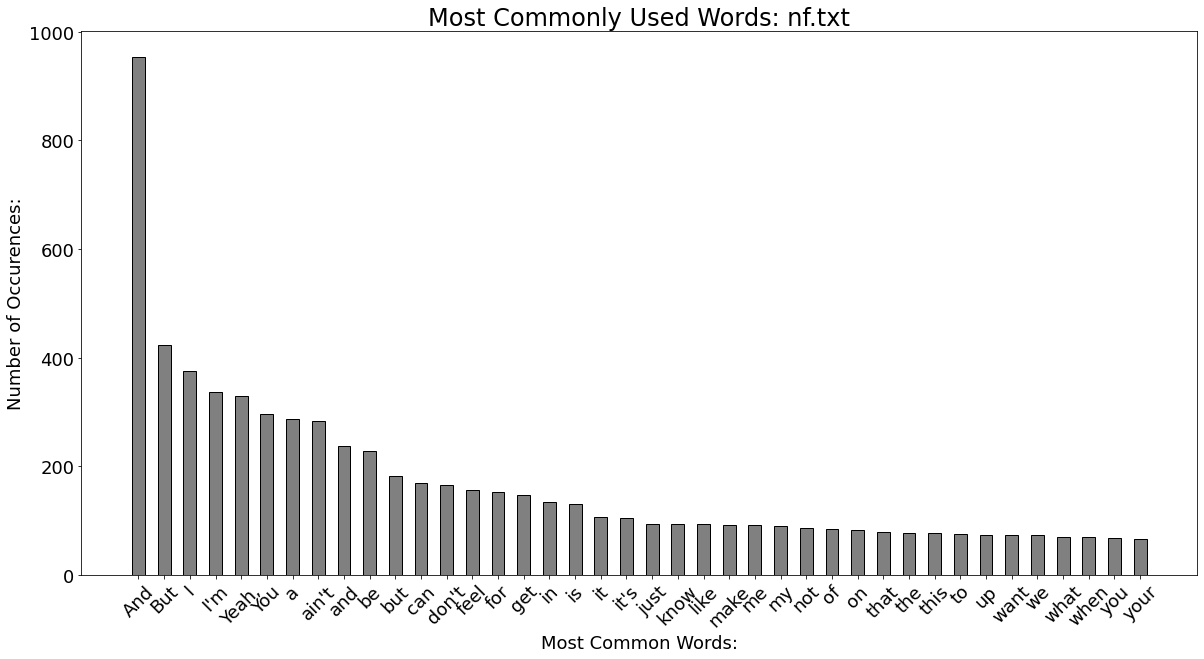

In [ ]:
artist_file = 'nf.txt'
plotWordFrequency(artist_file)

In [ ]:
artist_file = '../input/Lil_Wayne.txt'
plotWordFrequency(artist_file)

In [ ]:
pip install pronouncing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.3/939.3 KB 11.9 MB/s eta 0:00:00
  Created wheel for pronouncing: filename=pronouncing-0.2.0-py2.py3-none-any.whl size=6251 sha256=379bf49773acc0928a9ac8a42dff25f8413f26384b55de11e127aee60b4c1df7
  Stored in directory: /root/.cache/pip/wheels/ee/d4/c2/fb8c0e2009b75358874506ff2ce1ee79370b6ef5cf08922206
Successfully built pronouncing
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.0.0
    Uninstalling importlib-metadata-6.0.0:
      Successfully uninstalled importlib-metadata-6.0.0


In [ ]:
pip install markovify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.3 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18625 sha256=e9cd69c1ebb578d1c0736bef066c4cd85a19fc20e2745136caf1d84f777b8247
  Stored in directory: /root/.cache/pip/wheels/76/0a/ab/8727d219981e57e6036316dd2ec2037e61ccea0c016f7ae0c1
Successfully built markovify


Here we use Recurrent Neural Networks and Markov chains to generate new lyrics in the style of the input text. The Markovify functions (Markov Chains) are used to build new sentences (based off of word1=>word2 probabilities), while the Keras.LSTM functions (Recurrent Neural Networks) are used to predict the properties of the next line of the poem (e.g. # syllables, rhyme scheme), such that an appropriate new sentence can be selected (from the setences that were generated with Markovify).

In [ ]:
import pronouncing
import markovify
import re
import random
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers.core import Dense

Recurrent Neural Network (https://keras.io/layers/recurrent/#lstm)

In [ ]:
def create_network(depth):
	model = Sequential()
	model.add(LSTM(4, input_shape=(2, 2), return_sequences=True))
	for i in range(depth):
		model.add(LSTM(8, return_sequences=True))
	model.add(LSTM(2, return_sequences=True))
	model.summary()
	model.compile(optimizer='rmsprop',
              loss='mse')
	if artist + ".rap" in os.listdir(".") and train_mode == False:
		model.load_weights(str(artist + ".rap"))
		print("loading saved network: " + str(artist) + ".rap") 
	return model

Markov Chain (https://github.com/jsvine/markovify)

In [ ]:
def markov(text_file):
    ######
	read = open(text_file, "r", encoding='utf-8').read()
	text_model = markovify.NewlineText(read)
	return text_model

Determine number of syllables in line

In [ ]:
def syllables(line):
	count = 0
	for word in line.split(" "):
		vowels = 'aeiouy'
# 		word = word.lower().strip("!@#$%^&*()_+-={}[];:,.<>/?")
		word = word.lower().strip(".:;?!")
		if word[0] in vowels:
			count +=1
		for index in range(1,len(word)):
			if word[index] in vowels and word[index-1] not in vowels:
				count +=1
		if word.endswith('e'):
			count -= 1
		if word.endswith('le'):
			count+=1
		if count == 0:
			count +=1
	return count / maxsyllables

Make index of words that rhyme with your word

In [ ]:
def rhymeindex(lyrics):
	if str(artist) + ".rhymes" in os.listdir(".") and train_mode == False:
		print ("loading saved rhymes from " + str(artist) + ".rhymes")
		return open(str(artist) + ".rhymes", "r",encoding='utf-8').read().split("\n")
	else:
		rhyme_master_list = []
		print ("Building list of rhymes:")
		for i in lyrics:
			word = re.sub(r"\W+", '', i.split(" ")[-1]).lower()
			rhymeslist = pronouncing.rhymes(word)
			rhymeslistends = []      
			for i in rhymeslist:
				rhymeslistends.append(i[-2:])
			try:
				rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
			except Exception:
				rhymescheme = word[-2:]
			rhyme_master_list.append(rhymescheme)
		rhyme_master_list = list(set(rhyme_master_list))
		reverselist = [x[::-1] for x in rhyme_master_list]
		reverselist = sorted(reverselist)
		rhymelist = [x[::-1] for x in reverselist]
		print("List of Sorted 2-Letter Rhyme Ends:")
		print(rhymelist)
		f = open(str(artist) + ".rhymes", "w", encoding='utf-8')
		f.write("\n".join(rhymelist))
		f.close()
		return rhymelist

Make index of rhymes that you use

In [ ]:
def rhyme(line, rhyme_list):
	word = re.sub(r"\W+", '', line.split(" ")[-1]).lower()
	rhymeslist = pronouncing.rhymes(word)
	rhymeslistends = []
	for i in rhymeslist:
		rhymeslistends.append(i[-2:])
	try:
		rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
	except Exception:
		rhymescheme = word[-2:]
	try:
		float_rhyme = rhyme_list.index(rhymescheme)
		float_rhyme = float_rhyme / float(len(rhyme_list))
		return float_rhyme
	except Exception:
		float_rhyme = None
		return float_rhyme

Separate each line of the input txt

In [ ]:
def split_lyrics_file(text_file):
	text = open(text_file, encoding='utf-8').read()
	text = text.split("\n")
	while "" in text:
		text.remove("")
	return text

Generate lyrics

In [ ]:
def generate_lyrics(text_model, text_file):
	bars = []
	last_words = []
	lyriclength = len(open(text_file,encoding='utf-8').read().split("\n"))
	count = 0
	markov_model = markov(text_file)
	
	while len(bars) < lyriclength / 9 and count < lyriclength * 2:
		bar = markov_model.make_sentence(max_overlap_ratio = .49, tries=100)
		if type(bar) != type(None) and syllables(bar) < 1:
			def get_last_word(bar):
				last_word = bar.split(" ")[-1]
				if last_word[-1] in "!.?,":
					last_word = last_word[:-1]
				return last_word
			last_word = get_last_word(bar)
			if bar not in bars and last_words.count(last_word) < 3:
				bars.append(bar)
				last_words.append(last_word)
				count += 1
	return bars

Build dataset

In [ ]:
def build_dataset(lines, rhyme_list):
	dataset = []
	line_list = []
	for line in lines:
		line_list = [line, syllables(line), rhyme(line, rhyme_list)]
		dataset.append(line_list)
	x_data = []
	y_data = []
	for i in range(len(dataset) - 3):
		line1 = dataset[i    ][1:]
		line2 = dataset[i + 1][1:]
		line3 = dataset[i + 2][1:]
		line4 = dataset[i + 3][1:]
		x = [line1[0], line1[1], line2[0], line2[1]]
		x = np.array(x)
		x = x.reshape(2,2)
		x_data.append(x)
		y = [line3[0], line3[1], line4[0], line4[1]]
		y = np.array(y)
		y = y.reshape(2,2)
		y_data.append(y)
	x_data = np.array(x_data)
	y_data = np.array(y_data)
	return x_data, y_data

Compose verse

In [ ]:
def compose_rap(lines, rhyme_list, lyrics_file, model):
	rap_vectors = []
	human_lyrics = split_lyrics_file(lyrics_file)
	initial_index = random.choice(range(len(human_lyrics) - 1))
	initial_lines = human_lyrics[initial_index:initial_index + 2]
	starting_input = []
	for line in initial_lines:
		starting_input.append([syllables(line), rhyme(line, rhyme_list)])
	starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(1, 2, 2))
	rap_vectors.append(starting_vectors)
	for i in range(100):
		rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(1, 2, 2)))
	return rap_vectors

compose verse part 2

In [ ]:
def vectors_into_song(vectors, generated_lyrics, rhyme_list):
	print ("\n\n")	
	print ("Writing verse:")
	print ("\n\n")
	def last_word_compare(rap, line2):
		penalty = 0 
		for line1 in rap:
			word1 = line1.split(" ")[-1]
			word2 = line2.split(" ")[-1]
			while word1[-1] in "?!,. ":
				word1 = word1[:-1]
			while word2[-1] in "?!,. ":
				word2 = word2[:-1]
			if word1 == word2:
				penalty += 0.2
		return penalty
	def calculate_score(vector_half, syllables, rhyme, penalty):
		desired_syllables = vector_half[0]
		desired_rhyme = vector_half[1]
		desired_syllables = desired_syllables * maxsyllables
		desired_rhyme = desired_rhyme * len(rhyme_list)
		score = 1.0 - abs(float(desired_syllables) - float(syllables)) + abs(float(desired_rhyme) - float(rhyme)) - penalty
		return score
	dataset = []
	for line in generated_lyrics:
		line_list = [line, syllables(line), rhyme(line, rhyme_list)]
		dataset.append(line_list)
	rap = []
	vector_halves = []
	for vector in vectors:
		vector_halves.append(list(vector[0][0])) 
		vector_halves.append(list(vector[0][1]))
	for vector in vector_halves:
		scorelist = []
		for item in dataset:
			line = item[0]
			if len(rap) != 0:
				penalty = last_word_compare(rap, line)
			else:
				penalty = 0
			total_score = calculate_score(vector, item[1], item[2], penalty)
			score_entry = [line, total_score]
			scorelist.append(score_entry)
		fixed_score_list = [0]
		for score in scorelist:
			fixed_score_list.append(float(score[1]))
		max_score = max(fixed_score_list)
		for item in scorelist:
			if item[1] == max_score:
				rap.append(item[0])
				print (str(item[0]))
				for i in dataset:
					if item[0] == i[0]:
						dataset.remove(i)
						break
				break     
	return rap

training function

In [ ]:
def train(x_data, y_data, model):
	model.fit(np.array(x_data), np.array(y_data),
			  batch_size=2,
			  epochs=5,
			  verbose=1)
	model.save_weights(artist + ".rap")

train and run the model

In [ ]:
def main(depth, train_mode):
	model = create_network(depth)
	text_model = markov(text_file)
	if train_mode == True:
		bars = split_lyrics_file(text_file)
	if train_mode == False:
		bars = generate_lyrics(text_model, text_file)
	rhyme_list = rhymeindex(bars)
	if train_mode == True:
		x_data, y_data = build_dataset(bars, rhyme_list)
		train(x_data, y_data, model)
	if train_mode == False:
		vectors = compose_rap(bars, rhyme_list, text_file, model)
		rap = vectors_into_song(vectors, bars, rhyme_list)
		f = open(rap_file, "w", encoding='utf-8')
		for bar in rap:
			f.write(bar)
			f.write("\n")

Some important parameters to keep in mind are as follows: (1) maxsyllables: max # of syllables per line; (2) max_overlap_ratio: how different the output should be from the original input; (3) tries: how many times to try to build a line that satisifies some parameter; (4) epochs: how many times for the NN to pass over the data.

To reduce computational complexity, maximize (1) and (2) and minimize (3) and (4).
Computational time will increase dramatically when (1) is less than 8 and when (2) is less than 0.5

In [ ]:
depth = 4 
maxsyllables = 8
artist = "artist"
rap_file = "temporary_poem.txt"

write new lyrics in form of Notorious big

In [ ]:
maxsyllables = 8
text_file = "nf.txt"
train_mode = True        
main(depth, train_mode)
train_mode = False
main(depth, train_mode)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 4)              112       
                                                                 
 lstm_7 (LSTM)               (None, 2, 8)              416       
                                                                 
 lstm_8 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_9 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_10 (LSTM)              (None, 2, 8)              544       
                                                                 
 lstm_11 (LSTM)              (None, 2, 2)              88        
                                                                 
Total params: 2,248
Trainable params: 2,248
Non-traina

Write new lyrics in the style of Lil Wayne

In [ ]:
text_file = "../input/Lil_Wayne.txt"
maxsyllables = 8
train_mode = True        
main(depth, train_mode)
train_mode = False
main(depth, train_mode)

Write new lyrics in the combined style of Notorious B.I.G. and Lil Wayne.

In [ ]:
filenames = ['../input/Lil_Wayne.txt', '../input/notorious-big.txt']
with open('combined.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [ ]:
#artist_file = '../input/combined.txt'
artist_file = 'combined.txt'
plotWordFrequency(artist_file)

In [ ]:
maxsyllables = 8
text_file = "combined.txt"
train_mode = True        
main(depth, train_mode)
train_mode = False
main(depth, train_mode)